<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [28]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
# import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import various functions from scipy
from scipy import stats

# import 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler
# functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#from sklearn import preprocessing

#### Load the first dataset and check the first two observations

In [2]:
df1=pd.read_csv('winequality-white.csv',delimiter=';')
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

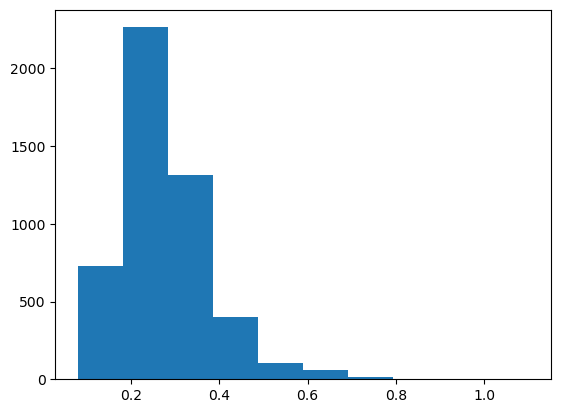

In [4]:
plt.hist(df1['volatile acidity'])
#plt.title('Distribution of volatile acidity', fontsize = 15)
#plt.xlabel('Volatile Acidity', fontsize = 15)
#plt.ylabel('Frequency', fontsize = 15)
plt.show()


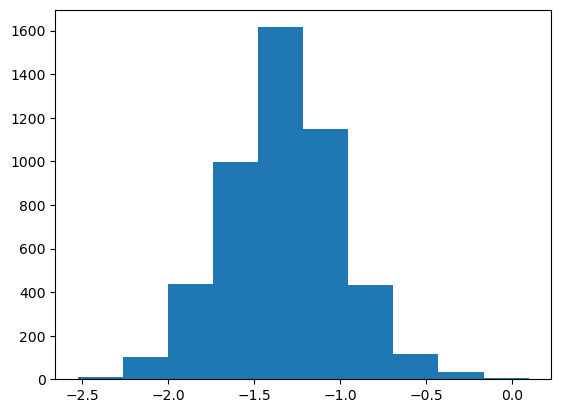

In [5]:
df1['volatile acidity'] = np.log(df1['volatile acidity'])
plt.hist(df1['volatile acidity'])
#plt.title('Distribution of volatile acidity', fontsize = 15)
#plt.xlabel('Volatile Acidity', fontsize = 15)
#plt.ylabel('Frequency', fontsize = 15)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

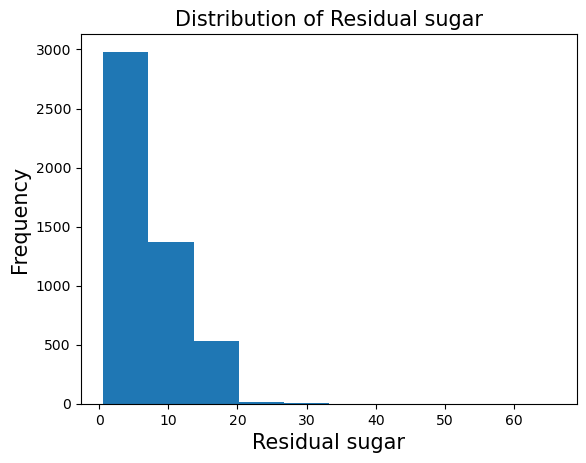

In [6]:
# type your code here
plt.hist(df1['residual sugar'])
plt.title('Distribution of Residual sugar', fontsize = 15)
plt.xlabel('Residual sugar', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
# display the plot
plt.show()

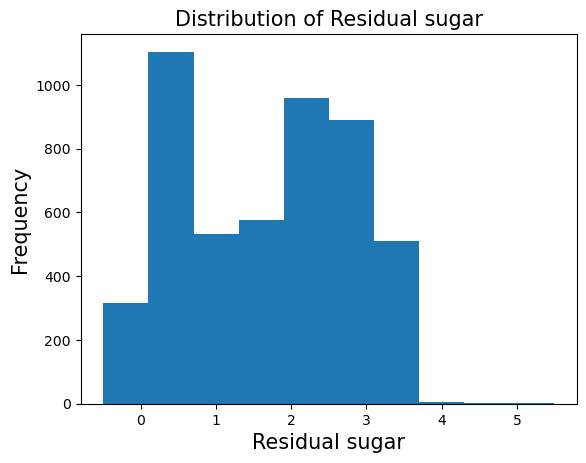

In [7]:
# applying box-cox transformation using boxcox()
# RS_lambda captures the optimal lamba value for box cox transformation
df1['residual sugar'], RS_lambda = stats.boxcox(df1['residual sugar'])
plt.hist(df1['residual sugar'])
plt.title('Distribution of Residual sugar', fontsize = 15)
plt.xlabel('Residual sugar', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here
# var(): calculates variance for all attributes in dataframe
df1.var()

fixed acidity             0.712114
volatile acidity          0.114351
citric acid               0.014646
residual sugar            1.217180
chlorides                 0.000477
free sulfur dioxide     289.242720
total sulfur dioxide   1806.085491
density                   0.000009
pH                        0.022801
sulphates                 0.013025
alcohol                   1.514427
quality                   0.784356
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

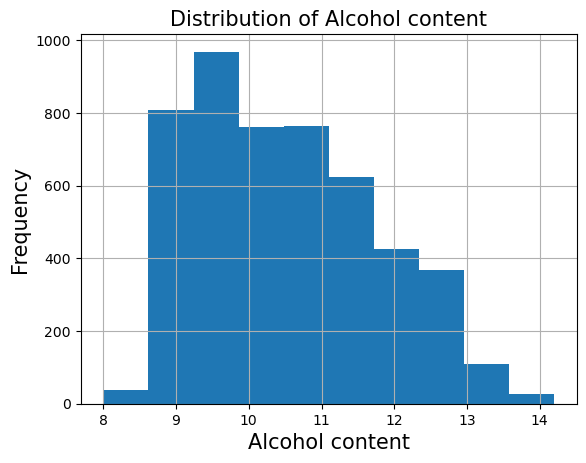

In [9]:
# type your code here
# plot the histogram of variable alcohol
df1.alcohol.hist()
plt.title('Distribution of Alcohol content', fontsize = 15)
plt.xlabel('Alcohol content', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()


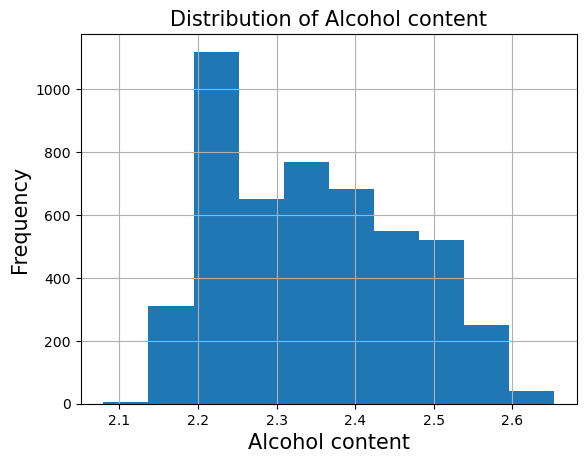

In [10]:
# applying log transformation
new_alcohol = np.log(df1.alcohol)
new_alcohol.hist()
plt.title('Distribution of Alcohol content', fontsize = 15)
plt.xlabel('Alcohol content', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

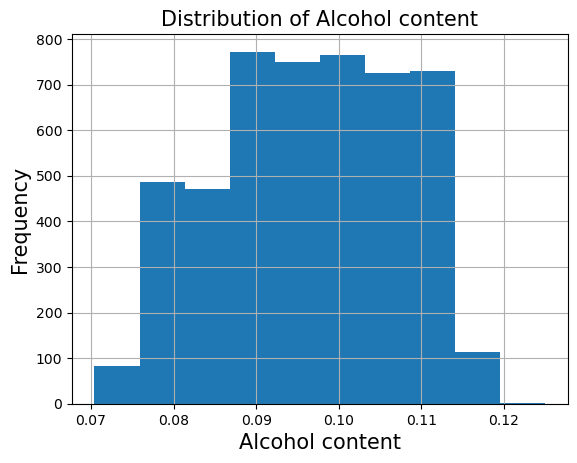

In [11]:
# applying reciprocal transformation
df1.alcohol = np.reciprocal(df1.alcohol)
df1.alcohol.hist()
plt.title('Distribution of Alcohol content', fontsize = 15)
plt.xlabel('Alcohol content', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
X=df1.iloc[:,:11]
X=sm.add_constant(X)

y = df1['quality']

MLR_model=sm.OLS(y,X).fit() 
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     167.5
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:44:50   Log-Likelihood:                -5571.0
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4886   BIC:                         1.124e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   88.3648 

In [13]:
#create the Scaler object 
scaler=StandardScaler()
df1.pH=scaler.fit_transform(pd.DataFrame(df1.pH))

# select all features of the data for full model 
X=df1.iloc[:,:11]
X=sm.add_constant(X)

y = df1['quality']

MLR_model=sm.OLS(y,X).fit() 
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     167.5
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:44:50   Log-Likelihood:                -5571.0
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4886   BIC:                         1.124e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   89.5381 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
df_numeric=df1.select_dtypes(include=[np.number])
df_numeric=df_numeric.drop('quality',axis=1)
df_numeric=sm.add_constant(df_numeric)
vif['feature']=df_numeric.columns
vif['VIF']=[VIF(df_numeric.values,i)for i in range(df_numeric.shape[1])]
print(vif)

                 feature            VIF
0                  const 1196359.362118
1          fixed acidity       1.959374
2       volatile acidity       1.165228
3            citric acid       1.196190
4         residual sugar       4.879700
5              chlorides       1.207945
6    free sulfur dioxide       1.764577
7   total sulfur dioxide       2.238206
8                density      11.357213
9                     pH       1.672799
10             sulphates       1.097858
11               alcohol       4.804308


In [31]:
# type your code here
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

df_numeric = df1.select_dtypes(include=[np.number])
df_numeric = df_numeric.drop("quality", axis = 1)

df_numeric = sm.add_constant(df_numeric)
vif["Features"] = df_numeric.columns
vif["VIF"] = [VIF(df_numeric.values, i) for i in range(df_numeric.shape[1])]

print(vif)


                Features            VIF
0                  const 1196359.362118
1          fixed acidity       1.959374
2       volatile acidity       1.165228
3            citric acid       1.196190
4         residual sugar       4.879700
5              chlorides       1.207945
6    free sulfur dioxide       1.764577
7   total sulfur dioxide       2.238206
8                density      11.357213
9                     pH       1.672799
10             sulphates       1.097858
11               alcohol       4.804308


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
X = df1.iloc[:,:10]

X = sm.add_constant(X)
y = df1['quality']
MLR_model = sm.OLS(y,X).fit()
residuals = MLR_model.resid
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     162.2
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          3.45e-295
Time:                        18:44:51   Log-Likelihood:                -5652.5
No. Observations:                4898   AIC:                         1.133e+04
Df Residuals:                    4887   BIC:                         1.140e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  212.4592 

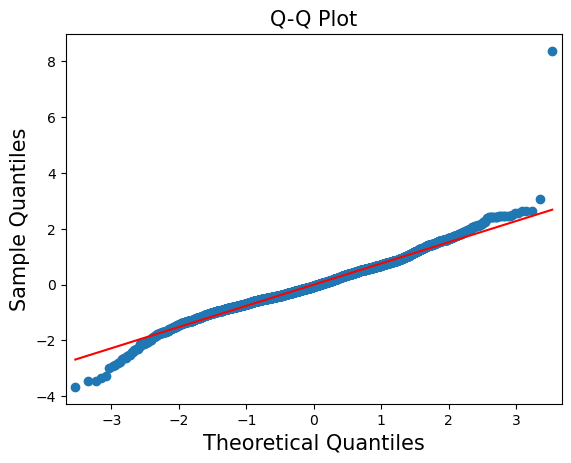

In [16]:
from statsmodels.graphics.gofplots import qqplot
qqplot(MLR_model.resid, line = 'r')
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

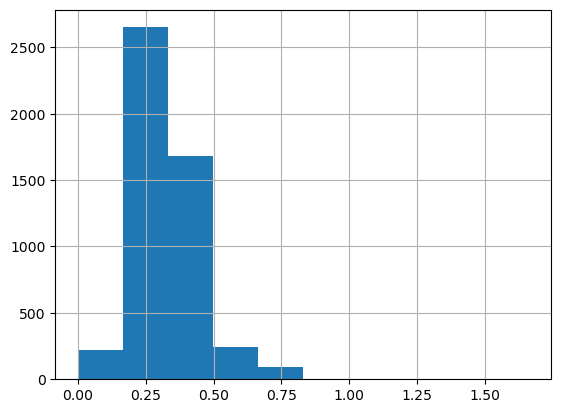

In [17]:
df1['citric acid'].hist()

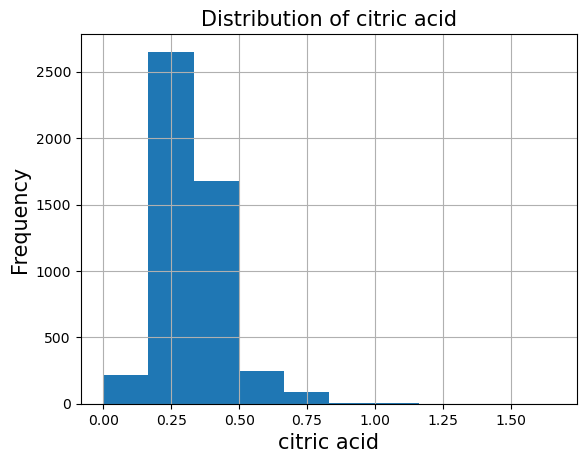

In [18]:
# type your code here
df1['citric acid'].hist()
plt.title('Distribution of citric acid', fontsize = 15)
plt.xlabel('citric acid', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

In [19]:

# perform square root transformation

df1['citric acid'] = np.sqrt(df1['citric acid'])

X = df1.iloc[:,:10]
X = sm.add_constant(X)
y = df1['quality']
MLR_model = sm.OLS(y,X).fit()
print(MLR_model.summary())

X = df1.iloc[:,:10]

X = sm.add_constant(X)

y = df1['quality']

MLR_model = sm.OLS(y,X).fit()

print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     163.3
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          7.23e-297
Time:                        18:44:51   Log-Likelihood:                -5648.6
No. Observations:                4898   AIC:                         1.132e+04
Df Residuals:                    4887   BIC:                         1.139e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  211.3771 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# type your code here
# residuals=MLR_model.resid
# for varible, subplot in zip(X.columns,[1,2]):
#     z=sns.scatterplot(X=X[varible],y=residuals, ax=subplot)
#     z.set_ylable('residuals',fontsize=10)
# plt.tight_layout()

# #display the plot

# plt.show()    

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
X=df1.drop('quality',axis=1)
y=df1['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
linreg=LinearRegression()
linreg_forward=sfs(estimator=linreg,k_features=5,forward=True,scoring='r2')
sfs_forward=linreg_forward.fit(X_train,y_train)
sfs_forward_best=list(sfs_forward.k_feature_names_)
print('Features selected',sfs_forward_best)
print(sfs_forward.k_score_)

Features selected ['fixed acidity', 'volatile acidity', 'residual sugar', 'sulphates', 'alcohol']
0.25925031726784187


In [22]:
X=df1.drop('quality',axis=1)
y=df1['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
lr=LinearRegression()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# type your code here
lr=LinearRegression()
lr_sfs= sfs(estimator=lr,k_features=5, forward=False)
sfs_backward=lr_sfs.fit(X_train,y_train)
backword_features=list(sfs_backward.k_feature_names_)
print(backword_features)
print(sfs_backward.k_score_)

['volatile acidity', 'residual sugar', 'density', 'sulphates', 'alcohol']
0.25960140807926463


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
lr=LinearRegression()
lr_sfs= sfs(estimator=lr,k_features=(2,6), forward=True)
sfs_forward=lr_sfs.fit(X_train,y_train)
backword_features=list(sfs_forward.k_feature_names_)
print(backword_features)
print(sfs_forward.k_score_)

['fixed acidity', 'volatile acidity', 'residual sugar', 'density', 'sulphates', 'alcohol']
0.26131803984442586


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
lr=LinearRegression()
lr_sfs= sfs(estimator=lr,k_features='best', forward=True)
sfs_forward_best=lr_sfs.fit(X_train,y_train)
forward_features_best=list(sfs_forward.k_feature_names_)
print(forward_features_best)

['fixed acidity', 'volatile acidity', 'residual sugar', 'density', 'sulphates', 'alcohol']


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
lr=LinearRegression()
lr_sfs= sfs(estimator=lr,k_features='best', forward=False)
sfs_backward_best=lr_sfs.fit(X_train,y_train)
backword_features_best=list(sfs_backward.k_feature_names_)
print(backword_features_best)
print(sfs_backward_best.k_score_)

['volatile acidity', 'residual sugar', 'density', 'sulphates', 'alcohol']
0.26292539544329346


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
rfe_model=RFE(estimator=lr,n_features_to_select=5)
rfe_model=rfe_model.fit(X_train,y_train)
feat_index=pd.Series(data=rfe_model.ranking_,index=X_train.columns)
signi_feat_rfe=feat_index[feat_index==1].index
print(signi_feat_rfe)

In [ ]:
new_X_train=X_train[signi_feat_rfe]
lr=LinearRegression()
lr.fit(new_X_train,y_train)
r2_value_rfe=lr.score(new_X_train,y_train)
print('r2_value_rfe ',r2_value_rfe)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
sfs_features=sfs_forward.k_feature_names_
new_X_train=X_train.loc[:sfs_features]
new_X_test=X_test.loc[:sfs_features]
lr=LinearRegression()
lr.fit(new_X_train,y_train)
train_pred=lr.predict(new_X_train)
test_pred=lr.predict(new_X_test)
mse_train=mean_squared_error(y_train,train_pred)
rmse_train=round(np.sqrt(mse_train),4)
print('rmse_train',rmse_train)

<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
ph_verbose=[]

# for the pH value equal to 7 append the list ph_verbose with 'Neutral'
# for the pH value greater than 7 append the list ph_verbose with 'Basic'
# for the pH value less than 7 append the list ph_verbose with 'Acidic'
for i in range(0,df1.pH.shape[0]):
    if df1.pH.iloc[i] == 7:
        ph_verbose.append('Neutral')
    elif df1.pH.iloc[i]>7:
        ph_verbose.append('Basic')    
    elif df1.pH.iloc[i]<7:
        ph_verbose.append('Acidic')

# create a new feature 'pH_verbose' with elements as 'ph_verbose'       
df1["pH_verbose"] = ph_verbose 

df1["pH_verbose"].value_counts()

# drop the variable 'pH_verbose'
df1.drop("pH_verbose", axis = 1, inplace = True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
# copying the original dataset
df1_copy = df1.copy()
X = df1_copy.drop('quality', axis = 1)
y = df1_copy['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

scores = cross_val_score(   estimator = LinearRegression(), 
                            X = X_train, 
                            y = y_train, 
                            cv = 2, 
                            scoring = 'r2')


print('All scores: ', scores)  
print("\nMinimum score obtained: ", round(min(scores), 4)) 
print("Maximum score obtained: ", round(max(scores), 4))  
print("Average score obtained: ", round(np.mean(scores), 4))


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
def get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)             # fit the model 
    return model.score(X_test_k, y_test_k) 

kf = KFold(n_splits = 5)

# create an empty list to store the scores
scores = []

for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    # calling the function 'get_scores()' and appending the scores in the list 'scores'
    scores.append(get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k))
    
# print all scores 
print('All scores: ', scores)  
print("\nMinimum score obtained: ", round(min(scores), 4)) 
print("Maximum score obtained: ", round(max(scores), 4))  
print("Average score obtained: ", round(np.mean(scores), 4))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
df1_copy = df1.copy()
X = df1_copy.drop('quality', axis = 1)
y = df1_copy['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)


loocv_rmse = []
# instantiate the LOOCV method 
loocv = LeaveOneOut()

# use the for loop to build the regression model for each cross validation 
for train_index, test_index in loocv.split(X_train):
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    
    linreg = LinearRegression()
    
    # fit the OLS model on training dataset
    linreg.fit(X_train_l, y_train_l)
    
    # calculate RMSE using test dataset
    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    rmse = np.sqrt(mse)
    loocv_rmse.append(rmse)